# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "0a3f547761154cd89b5616aa3f34603e9902d002"
connection.set_access_token(API_TOKEN)

Access token is valid.


#### NOTE: Before creating or executing the strategy, ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png)

# Strategy Creation

## Import Strategy from pyaglostrategypool


In [5]:
! wget -O aroon_crossover_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/aroon_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' aroon_crossover_us.py

--2023-12-01 22:26:08--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/aroon_crossover.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2570 (2.5K) [text/plain]
Saving to: ‘aroon_crossover_us.py’

aroon_crossover_us. 100%[===================>]   2.51K  --.-KB/s    in 0s      

2023-12-01 22:26:09 (43.5 MB/s) - ‘aroon_crossover_us.py’ saved [2570/2570]



In [6]:
from aroon_crossover_us import AroonCrossover as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 137572,
 'strategyId': '601bc267381c41bb95ab0e06dae3dbdd'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('AAPL', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:AAPL'

## Setup Parameters

In [10]:
parameters = {
  'TIME_PERIOD': 12
}

In [11]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:AAPL', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds
)


Starting the strategy 'Aroon Crossover' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ Aroon Crossover           │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:AAPL']           │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 12}       │
├─────────────────────────┼─────────────

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (5)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [15]:
print(logs)

[2023-12-01 22:26:50] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-12-01 22:26:50] Sanity checks on cfg successful.
[2023-12-01 22:26:50] Currency set to "USD"
[2023-12-01 22:26:50] Setting up broker connection...
[2023-12-01 22:26:52] Starting ALPACAV2 in PAPER mode...
[2023-12-01 22:26:53] Broker connection has been setup successfully.
[2023-12-01 22:26:53] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-12-01 22:26:53] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-12-01 22:26:53] Welcome ALGOBULLS VIRTUAL USER!
[2023-12-01 22:26:53] Reading strategy...
[2023-12-01 22:26:53] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


## Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NASDAQ,AAPL,2021-08-03 11:30:00-04:00,SELL,5,$,145.80,,2021-08-03 12:30:00-04:00,BUY,5,$,147.01,,-6.05,-6.05,0,-6.05
1,NASDAQ,AAPL,2021-08-03 12:30:00-04:00,BUY,5,$,147.01,,2021-08-03 13:30:00-04:00,SELL,5,$,147.01,,0.00,-6.05,0,0.00
2,NASDAQ,AAPL,2021-08-03 13:30:00-04:00,BUY,5,$,147.01,,2021-08-03 14:30:00-04:00,SELL,5,$,147.01,,0.00,-6.05,0,0.00
3,NASDAQ,AAPL,2021-08-03 14:30:00-04:00,BUY,5,$,147.01,,2021-08-03 15:30:00-04:00,SELL,5,$,147.01,,0.00,-6.05,0,0.00
4,NASDAQ,AAPL,2021-08-06 09:30:00-04:00,SELL,5,$,146.32,,2021-08-06 15:30:00-04:00,BUY,5,$,146.29,,0.15,-5.90,0,0.15
5,NASDAQ,AAPL,2021-08-10 11:30:00-04:00,SELL,5,$,145.62,,2021-08-10 15:30:00-04:00,BUY,5,$,145.62,,0.00,-5.90,0,0.00
6,NASDAQ,AAPL,2021-08-12 10:30:00-04:00,BUY,5,$,147.54,,2021-08-12 15:30:00-04:00,SELL,5,$,148.04,,2.50,-3.40,0,2.50
7,NASDAQ,AAPL,2021-08-16 11:30:00-04:00,SELL,5,$,147.72,,2021-08-16 15:30:00-04:00,BUY,5,$,148.32,,-3.00,-6.40,0,-3.00
8,NASDAQ,AAPL,2021-08-18 11:30:00-04:00,SELL,5,$,148.43,,2021-08-18 15:30:00-04:00,BUY,5,$,148.46,,-0.15,-6.55,0,-0.15
9,NASDAQ,AAPL,2021-08-20 11:30:00-04:00,BUY,5,$,147.75,,2021-08-20 15:30:00-04:00,SELL,5,$,147.35,,-2.00,-8.55,0,-2.00


## Statistics Reports

### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-03
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      96.0%

Cumulative Return   0.34%
CAGR﹪              0.17%

Sharpe              0.23
Prob. Sharpe Ratio  57.56%
Sortino             0.33
Sortino/√2          0.23
Omega               1.04

Max Drawdown        -1.85%
Longest DD Days     358

Gain/Pain Ratio     0.05
Gain/Pain (1M)      0.11

Payoff Ratio        1.03
Profit Factor       1.04
Common Sense Ratio  1.14
CPC Index           0.54
Tail Ratio          1.1
Outlier Win Ratio   4.89
Outlier Loss Ratio  4.14

MTD                 -0.18%
3M                  0.3%
6M                  0.02%
YTD                 -0.12%
1Y                  0.69%
3Y (ann.)           0.17%
5Y (ann.)           0.17%
10Y (ann.)          0.17%
All-time (ann.)     0.17%

Avg. Drawdown       -0.57%
Avg. Drawdown Days  114
Recovery Factor     0.19
Ulcer Index         0.01
Serenity Index      0.05


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-03
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             96.0%

Cumulative Return          0.34%
CAGR﹪                     0.17%

Sharpe                     0.23
Prob. Sharpe Ratio         57.56%
Smart Sharpe               0.22
Sortino                    0.33
Smart Sortino              0.31
Sortino/√2                 0.23
Smart Sortino/√2           0.22
Omega                      1.04

Max Drawdown               -1.85%
Longest DD Days            358
Volatility (ann.)          2.25%
Calmar                     0.09
Skew                       -0.03
Kurtosis                   5.7

Expected Daily %           0.0%
Expected Monthly %         0.01%
Expected Yearly %          0.11%
Kelly Criterion            2.16%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.23%
Expected Shortfall (cVaR)  -0.23%

Max Consecutive Wins       5
Max

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-05-24,2022-10-21,2023-05-18,358,-1.851391,-1.791709
2,2021-09-01,2021-09-10,2022-05-11,252,-0.835245,-0.673182
3,2023-06-07,2023-07-28,2023-07-31,53,-0.496623,-0.485449
4,2021-08-16,2021-08-20,2021-08-30,13,-0.128860,-0.082570
5,2022-05-13,2022-05-13,2022-05-18,5,-0.076024,0.000000


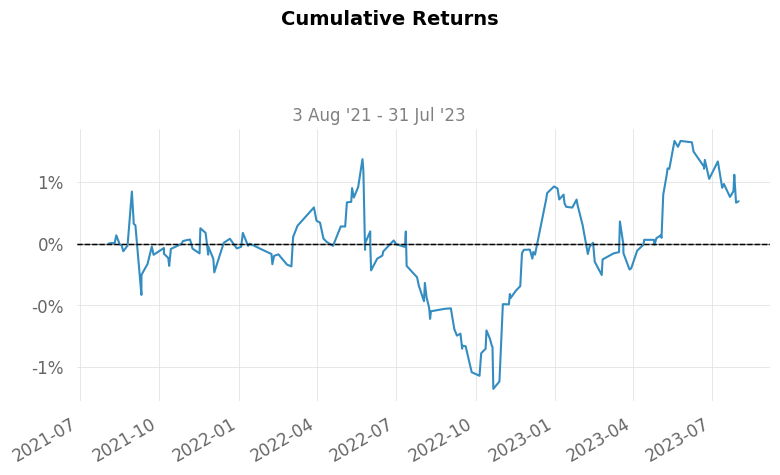

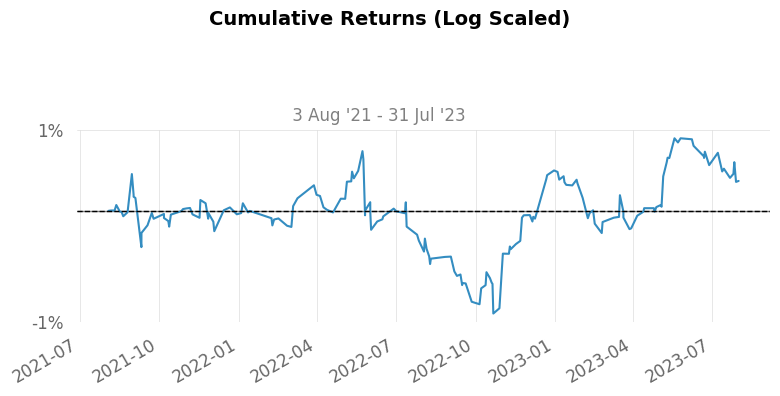

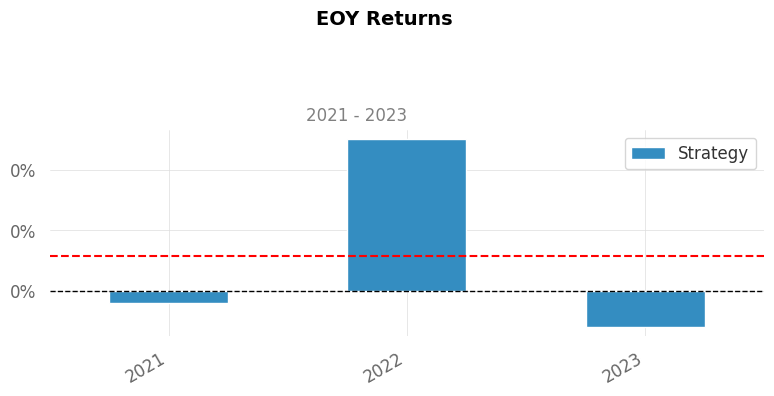

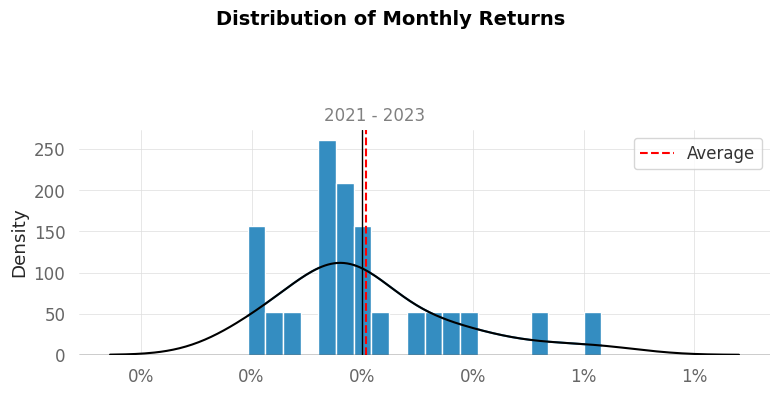

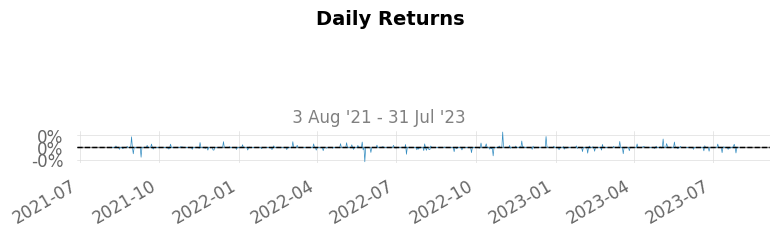

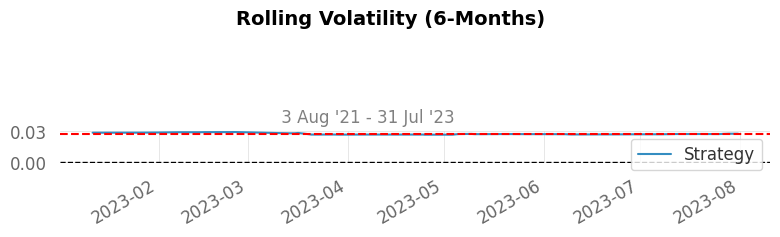

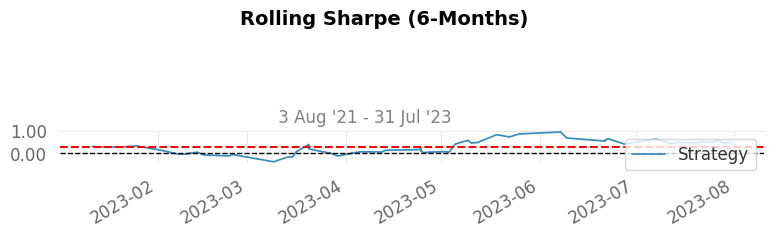

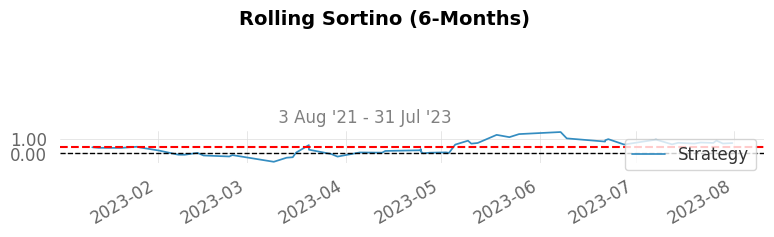

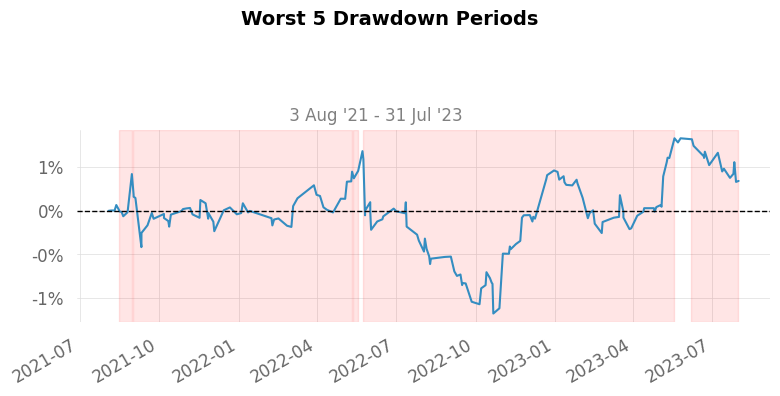

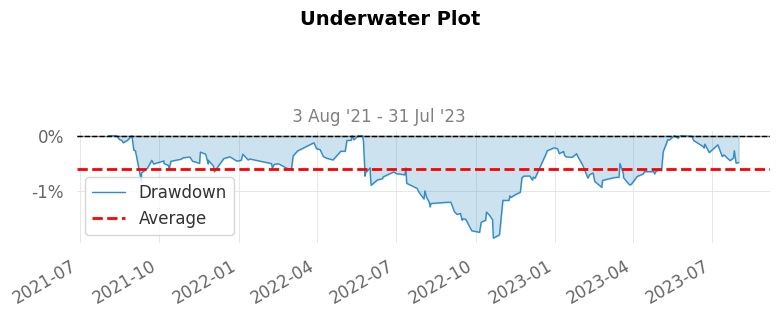

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


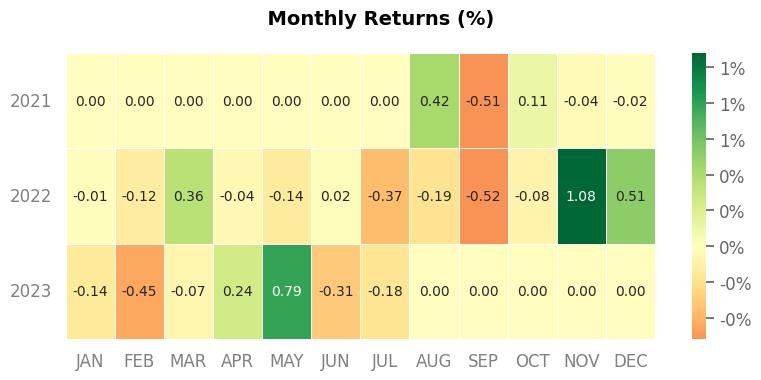

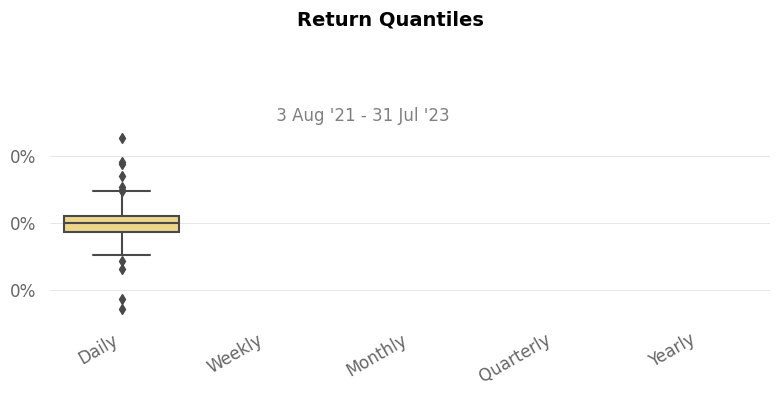

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | e0e3f2e9bfd54254a4782df6a8eff2a6 |
| Transaction Type | SELL                             |
| Instrument       | NASDAQ:AAPL                      |
| Quantity         | 5                                |
| Price            | $196.18                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-12-01T17:03:43.472009Z | COMPLETE               |
| 2023-12-01T17:03:43.471992Z | OPEN                   |
| 2023-12-01T17:03:43.471974Z | OPEN PENDING           |
| 2023-12-01T17:03:43.471950Z | VALIDATION PENDING     |
| 2023-12-01T17:03:43.471894Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 1f894b36366843339

## Papertrading

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:AAPL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute'
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
broking_details = {
    'brokerName': 'ALPACA LIVE',
    'credentialParameters': {}
}

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='9:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:AAPL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy, display_logs_in_auto_update_mode=False)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)